<a href="https://colab.research.google.com/github/rht6226/BTP-DD/blob/main/Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset

In [1]:
DIR = '/content/drive/MyDrive/Drowsiness Detection/Processed_Features/'

In [2]:
import pandas as pd
import numpy as np


def get_dataset():
    train_df = pd.read_csv(DIR + 'train.csv')
    test_df = pd.read_csv(DIR + 'test.csv')

    y_train = train_df['Label'].values
    y_test = test_df['Label'].values

    X_train = train_df.drop(['Label'], axis=1).to_numpy()
    X_test = test_df.drop(['Label'], axis=1).to_numpy()

    print("X_train - {} , y_train - {}".format(X_train.shape, y_train.shape))
    print("X_test - {} , y_test - {}".format(X_test.shape, y_test.shape))

    return (X_train, y_train), (X_test, y_test)

In [3]:
(X_train, y_train), (X_test, y_test) = get_dataset()

X_train - (11388, 8) , y_train - (11388,)
X_test - (3603, 8) , y_test - (3603,)


# Models

In [4]:
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
auc_score = dict()
model = dict()
y_predicted = dict()

In [5]:
# Get avg. prediction for 3 frames
def average(y_pred):
  for i in range(len(y_pred) - 1):
    if i % 240 == 0 or (i+1) % 240 == 0:
      pass
    else: 
      average = float(y_pred[i-1] +  y_pred[i] + y_pred[i+1])/3
      if average >= 0.5:
        y_pred[i] = 1
      else:
        y_pred[i] = 0
  return y_pred

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
def print_analysis(y_test, y_pred, y_score):
    print("Accuracy:", accuracy_score(y_test,y_pred))
    print("Precison:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC Score: ", roc_auc_score(y_test, y_score))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
clf_LR = LogisticRegression(max_iter=1000000, verbose=1, C=0.2).fit(X_train, y_train)
y_pred = clf_LR.predict(X_test)
y_pred = average(y_pred)
y_score = clf_LR.predict_proba(X_test)[:,1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [9]:
print_analysis(y_test, y_pred, y_score)

Accuracy: 0.7502081598667777
Precison: 0.8413251961639059
Recall: 0.5733808674985146
F1 Score: 0.6819787985865725
ROC Score:  0.7891448182808477
Confusion Matrix:
[[1738  182]
 [ 718  965]]


In [10]:
accuracy['LR'] = accuracy_score(y_test, y_pred)
precision['LR'] = precision_score(y_test, y_pred)
recall['LR'] = recall_score(y_test, y_pred)
f1['LR'] = f1_score(y_test, y_pred)
auc_score['LR'] = roc_auc_score(y_test, y_score)
model['LR'] = clf_LR
y_predicted['LR'] = y_pred

## KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
import matplotlib.pyplot as plt

In [13]:
import matplotlib as mlp
import matplotlib.pyplot as plt

def plot_score_graph(acc_list, f1_score_list, roc_list, title, figsize=[8, 8]):
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = figsize
    
    plt.plot(acc_list)
    plt.plot(f1_score_list)
    plt.plot(roc_list)

    plt.legend(['Accuracy', 'F1 Score', 'ROC AUC Score'], loc ="lower right")
    plt.title(title)

In [14]:
from sklearn import metrics
def get_k_value(X_train, y_train):
    acc_list = []
    f1_score_list = []
    roc_list = []

    for i in range(1,100):
        # Define KNN and Fit data
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train, y_train)

        # Predict values 
        pred_KN = neigh.predict(X_test)
        pred_KN = average(pred_KN)

        # Get Score
        y_score = neigh.predict_proba(X_test)[:,1]

        # Print metrices
        acc_list.append(accuracy_score(y_test, pred_KN))
        f1_score_list.append(metrics.f1_score(y_test, pred_KN))
        roc_list.append(metrics.roc_auc_score(y_test, y_score))

    index = acc_list.index(max(acc_list))
    
    print('')
    print('Best K value: ', index + 1)
    print('accuracy: ', acc_list[index])
    print('f1_score: ', f1_score_list[index])
    print('roc_score: ', roc_list[index])

    return acc_list, f1_score_list, roc_list

In [15]:
acc_list_knn, f1_score_list_knn, roc_list_knn = get_k_value(X_train, y_train)


Best K value:  80
accuracy:  0.8184845961698585
f1_score:  0.7841584158415842
roc_score:  0.8281140139136464


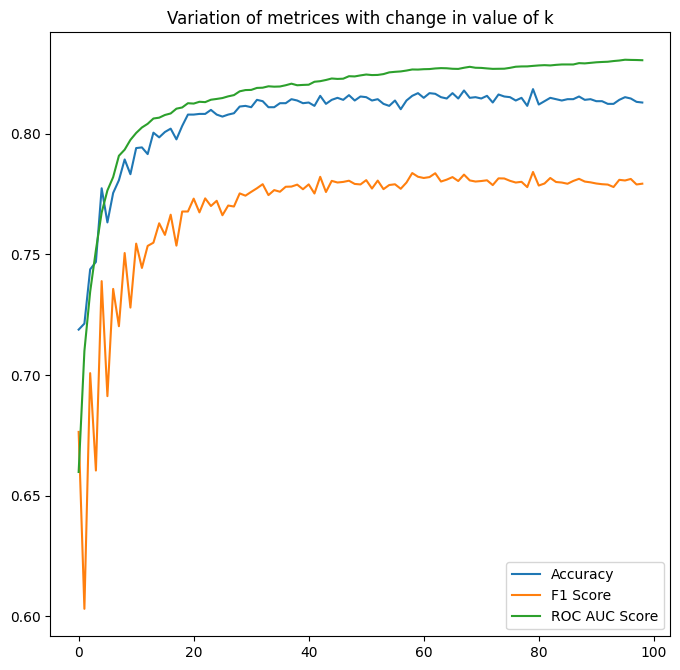

In [16]:
plot_score_graph(acc_list_knn, f1_score_list_knn, roc_list_knn, 'Variation of metrices with change in value of k')

In [17]:
# Define KNN and Fit data
clf_neigh = KNeighborsClassifier(n_neighbors=80)
clf_neigh.fit(X_train, y_train)

# Predict values 
y_pred_KN = clf_neigh.predict(X_test)
y_pred_KN = average(y_pred_KN)

# Get Score
y_score_KN = clf_neigh.predict_proba(X_test)[:,1]

In [18]:
print_analysis(y_test, y_pred_KN, y_score_KN)

Accuracy: 0.8184845961698585
Precison: 0.8819599109131403
Recall: 0.7058823529411765
F1 Score: 0.7841584158415842
ROC Score:  0.8281140139136464
Confusion Matrix:
[[1761  159]
 [ 495 1188]]


In [19]:
accuracy['KNN'] = accuracy_score(y_test, y_pred_KN)
precision['KNN'] = precision_score(y_test, y_pred_KN)
recall['KNN'] = recall_score(y_test, y_pred_KN)
f1['KNN'] = f1_score(y_test, y_pred_KN)
auc_score['KNN'] = roc_auc_score(y_test, y_score_KN)
model['KNN'] = clf_neigh
y_predicted['KNN'] = y_pred_KN

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn import metrics
def get_depth_value(X_train, y_train):
    acc_list = []
    f1_score_list = []
    roc_list = []

    for i in range(2,20):
        # Define DT and Fit data
        dt = DecisionTreeClassifier(random_state=0, max_depth=i)
        dt.fit(X_train, y_train)

        # Predict values 
        pred_dt = dt.predict(X_test)
        pred_dt = average(pred_dt)

        # Get Score
        y_score_dt = dt.predict_proba(X_test)[:,1]

        # Print metrices
        acc_list.append(accuracy_score(y_test, pred_dt))
        f1_score_list.append(metrics.f1_score(y_test, pred_dt))
        roc_list.append(metrics.roc_auc_score(y_test, y_score_dt))

    index = acc_list.index(max(acc_list))
    
    print('')
    print('Best Depth value: ', index)
    print('accuracy: ', acc_list[index])
    print('f1_score: ', f1_score_list[index])
    print('roc_score: ', roc_list[index])

    return acc_list, f1_score_list, roc_list

In [22]:
acc_list_dt, f1_score_list_dt, roc_list_dt = get_depth_value(X_train, y_train)


Best Depth value:  4
accuracy:  0.8223702470163753
f1_score:  0.7953964194373401
roc_score:  0.7895276292335116


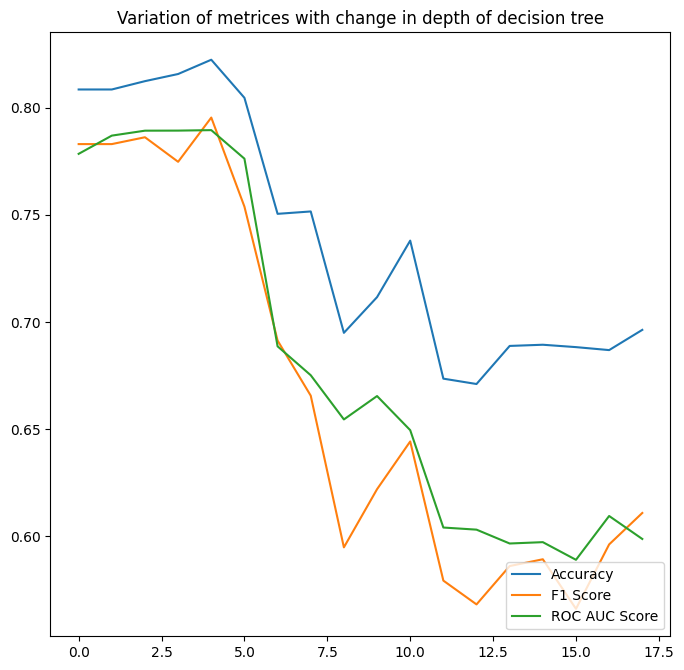

In [23]:
plot_score_graph(acc_list_dt, f1_score_list_dt, roc_list_dt, 'Variation of metrices with change in depth of decision tree')

In [24]:
# Create and Fit Decison tree
clf_dt = DecisionTreeClassifier(random_state=0, max_depth=5)
clf_dt.fit(X_train, y_train)

# Get predictions
y_pred_dt = clf_dt.predict(X_test)
y_pred_dt = average(y_pred_dt)
 # Get Score
y_score_dt = clf_dt.predict_proba(X_test)[:,1]

In [25]:
print_analysis(y_test, y_pred_dt, y_score_dt)

Accuracy: 0.8157091312794893
Precison: 0.9027667984189723
Recall: 0.6785502079619726
F1 Score: 0.7747625508819539
ROC Score:  0.7893105379778175
Confusion Matrix:
[[1797  123]
 [ 541 1142]]


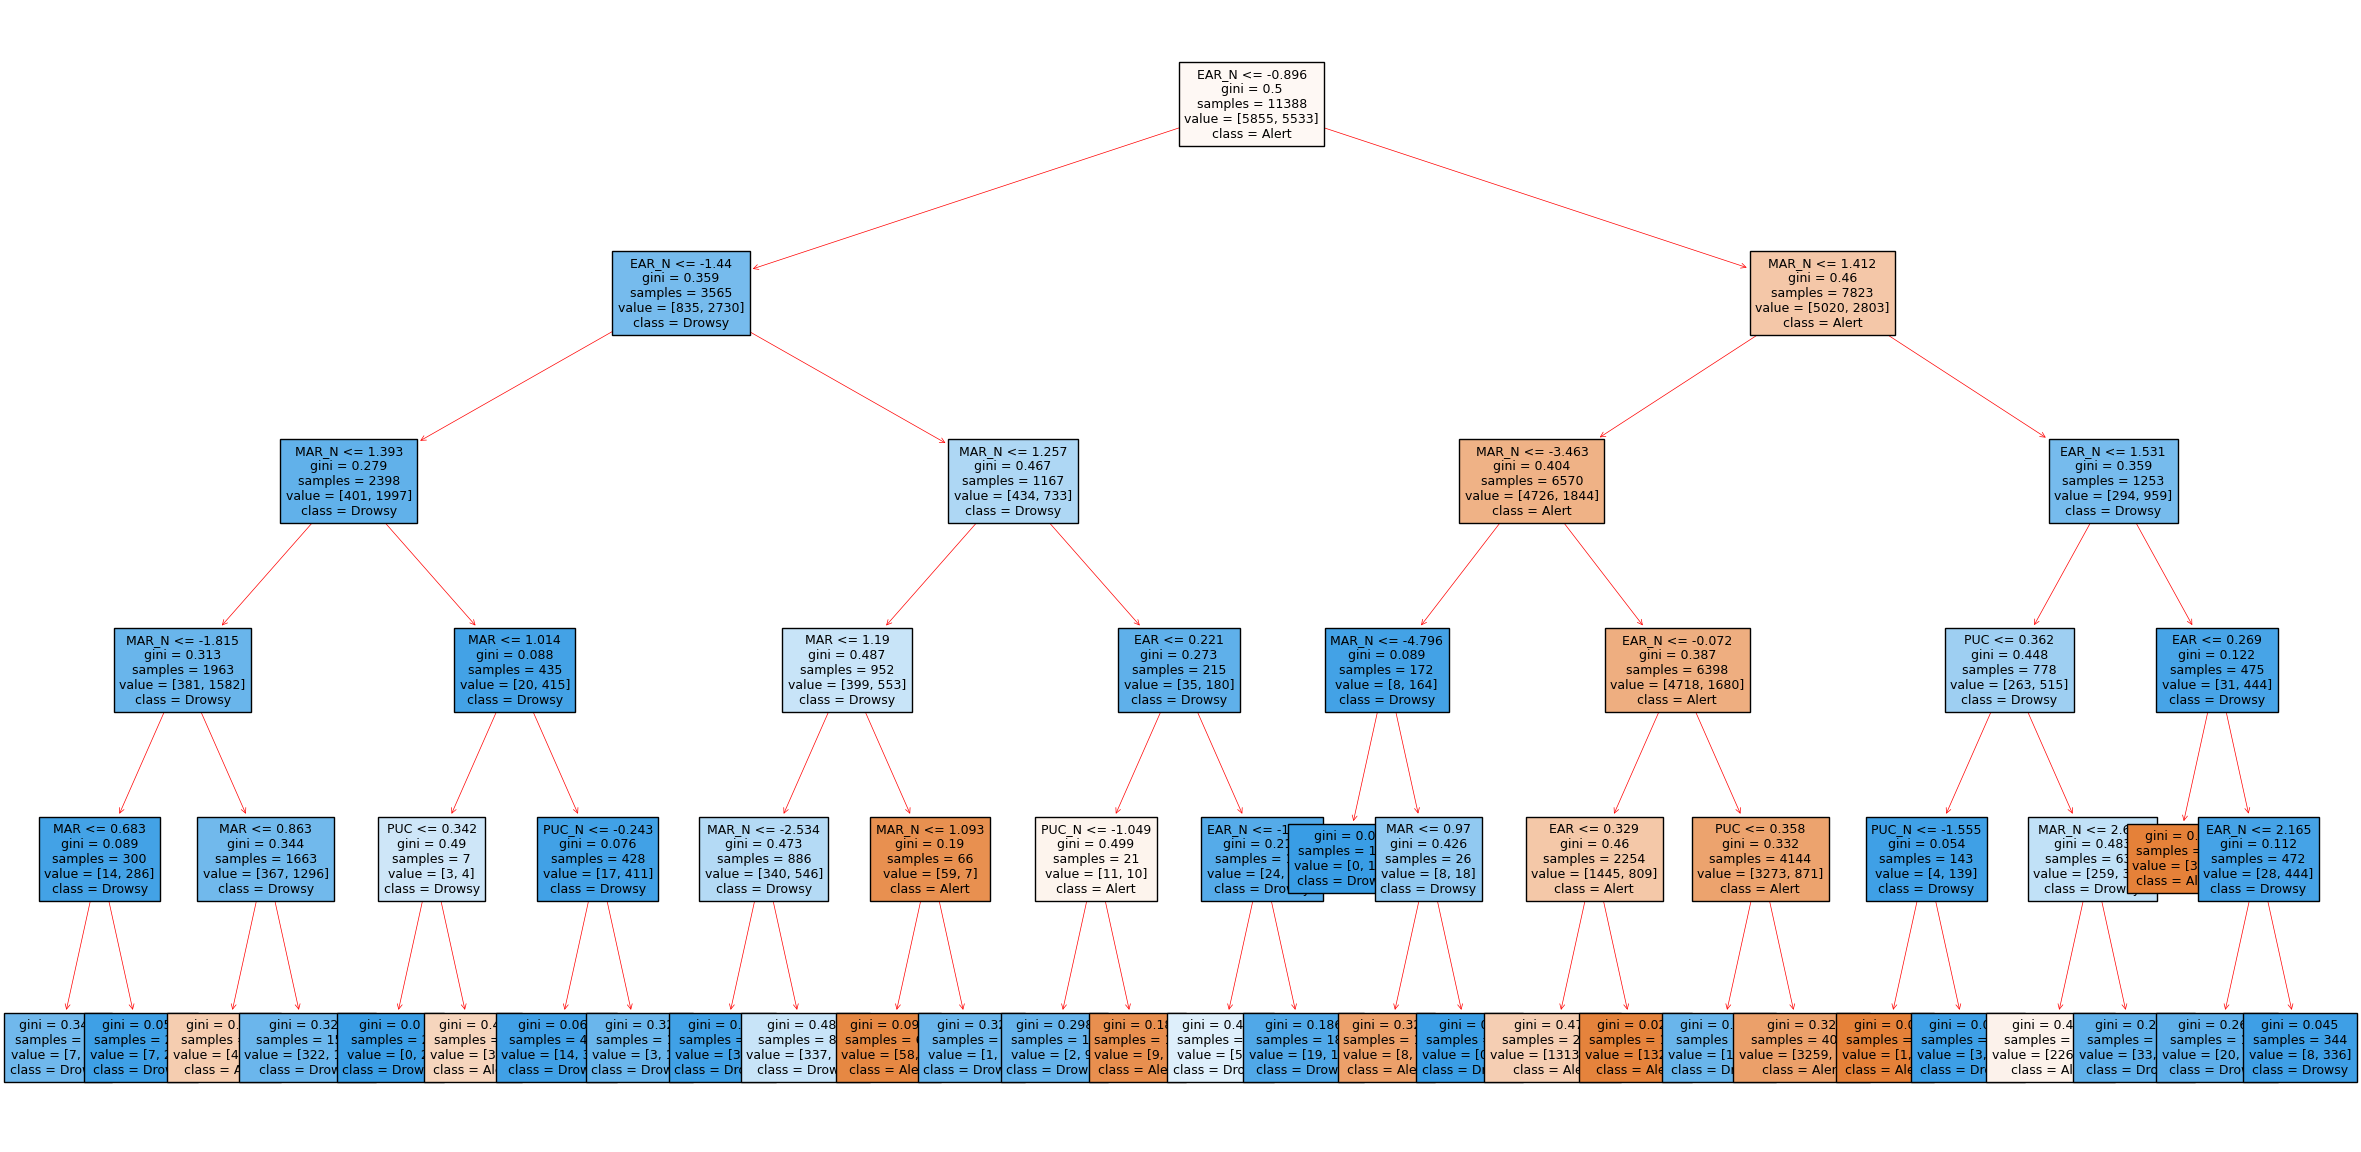

In [26]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(30)

cols = ['EAR', 'MAR', 'PUC', 'MOE', 'EAR_N', 'MAR_N', 'PUC_N', 'MOE_N']
out = tree.plot_tree(clf_dt, feature_names=cols,  class_names=['Alert', 'Drowsy'], filled=True, fontsize=9)



for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(0.5)

In [27]:
accuracy['DT'] = accuracy_score(y_test, y_pred_dt)
precision['DT'] = precision_score(y_test, y_pred_dt)
recall['DT'] = recall_score(y_test, y_pred_dt)
f1['DT'] = f1_score(y_test, y_pred_dt)
auc_score['DT'] = roc_auc_score(y_test, y_score_dt)
model['DT'] = clf_dt
y_predicted['DT'] = y_pred_dt

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
def get_best_depth(X_train, y_train, X_test, y_test):
    acc_list=[]
    f1_score_list = []
    roc_list = []

    for i in range(1,30):
        # fit data on classifier
        clf_RF = RandomForestClassifier(max_depth=i)
        clf_RF.fit(X_train, y_train)
        # Predict values 
        pred_RF = clf_RF.predict(X_test)
        pred_RF = average(pred_RF)
        # Get Score
        y_score_RF = clf_RF.predict_proba(X_test)[:,1]
        # Append Scores
        acc_list.append(accuracy_score(y_test, pred_RF))
        f1_score_list.append(metrics.f1_score(y_test, pred_RF))
        roc_list.append(metrics.roc_auc_score(y_test, y_score_RF))
    
    index = acc_list.index(max(acc_list))
    
    print('')
    print('Best Depth value: ', index)
    print('accuracy: ', acc_list[index])
    print('f1_score: ', f1_score_list[index])
    print('roc_score: ', roc_list[index])

    return acc_list, f1_score_list, roc_list

In [33]:
acc_list_dt, f1_score_list_dt, roc_list_dt = get_best_depth(X_train, y_train, X_test, y_test)


Best Depth value:  6
accuracy:  0.8254232583957813
f1_score:  0.7912379688018585
roc_score:  0.8172806496335909


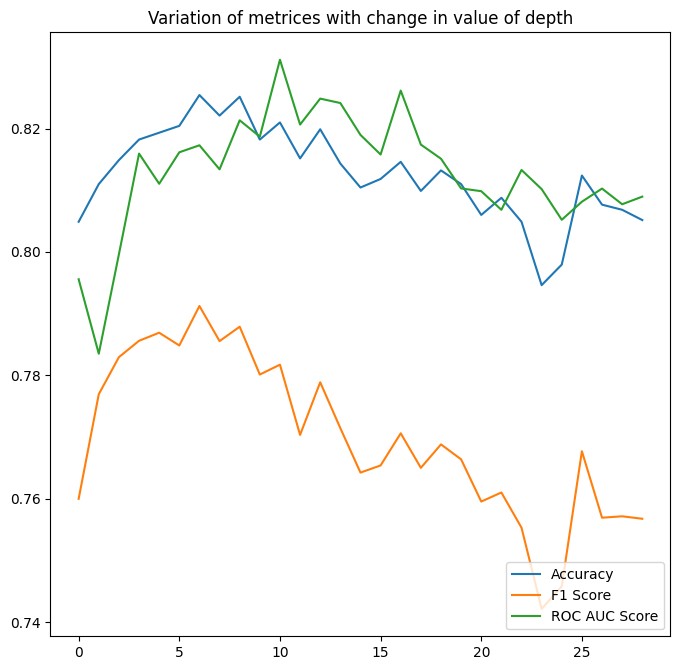

In [34]:
plot_score_graph(acc_list_dt, f1_score_list_dt, roc_list_dt, 'Variation of metrices with change in value of depth')

In [37]:
# Create and Fit Random Forest
clf_RF = RandomForestClassifier(random_state=0, max_depth=6)
clf_RF.fit(X_train, y_train)

# Get predictions
y_pred_RF = clf_RF.predict(X_test)
y_pred_RF = average(y_pred_RF)
 # Get Score
y_score_RF = clf_RF.predict_proba(X_test)[:,1]

In [38]:
print_analysis(y_test, y_pred_RF, y_score_RF)

Accuracy: 0.8201498751040799
Precison: 0.8935361216730038
Recall: 0.6981580510992276
F1 Score: 0.7838559039359573
ROC Score:  0.8146299081501287
Confusion Matrix:
[[1780  140]
 [ 508 1175]]


In [56]:
columns=['EAR', 'MAR', 'PUC', 'MOE', 'EAR_N', 'MAR_N', 'PUC_N', 'MOE_N']
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
EAR_N,0.243133
MAR_N,0.203184
MOE_N,0.179529
PUC_N,0.158817
EAR,0.067241
PUC,0.051352
MAR,0.050865
MOE,0.045879


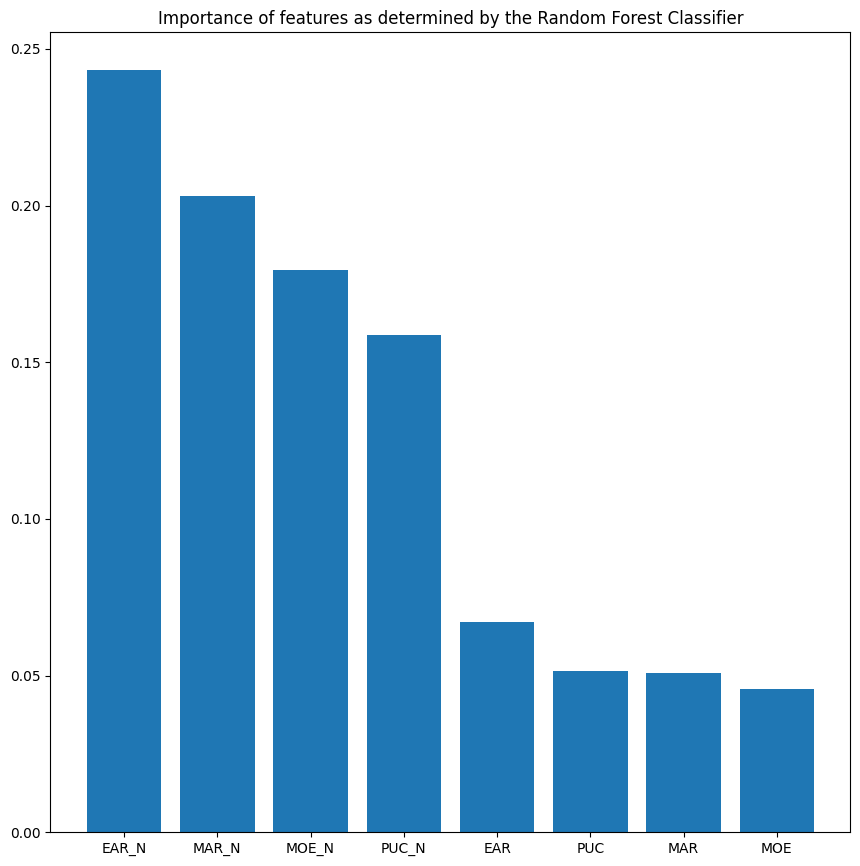

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(feature_importances.index, feature_importances.importance.values)
plt.title('Importance of features as determined by the Random Forest Classifier')
plt.show()

In [39]:
accuracy['RF'] = accuracy_score(y_test, y_pred_RF)
precision['RF'] = precision_score(y_test, y_pred_RF)
recall['RF'] = recall_score(y_test, y_pred_RF)
f1['RF'] = f1_score(y_test, y_pred_RF)
auc_score['RF'] = roc_auc_score(y_test, y_score_RF)
model['RF'] = clf_RF
y_predicted['RF'] = y_pred_RF

##  XG Boost Classifier

In [42]:
from xgboost import XGBClassifier

In [43]:
# Create and Fit XGB Classifier
clf_XGB = XGBClassifier()
clf_XGB.fit(X_train, y_train)

# Get predictions
y_pred_XGB = clf_XGB.predict(X_test)
y_pred_XGB = average(y_pred_XGB)
 # Get Score
y_score_XGB = clf_XGB.predict_proba(X_test)[:,1]

In [44]:
print_analysis(y_test, y_pred_XGB, y_score_XGB)

Accuracy: 0.8254232583957813
Precison: 0.8675034867503487
Recall: 0.7391562685680333
F1 Score: 0.7982034007058069
ROC Score:  0.8382798573975044
Confusion Matrix:
[[1730  190]
 [ 439 1244]]


In [45]:
accuracy['XGB'] = accuracy_score(y_test, y_pred_XGB)
precision['XGB'] = precision_score(y_test, y_pred_XGB)
recall['XGB'] = recall_score(y_test, y_pred_XGB)
f1['XGB'] = f1_score(y_test, y_pred_XGB)
auc_score['XGB'] = roc_auc_score(y_test, y_score_XGB)
model['XGB'] = clf_XGB
y_predicted['XGB'] = y_pred_XGB

# Analysis

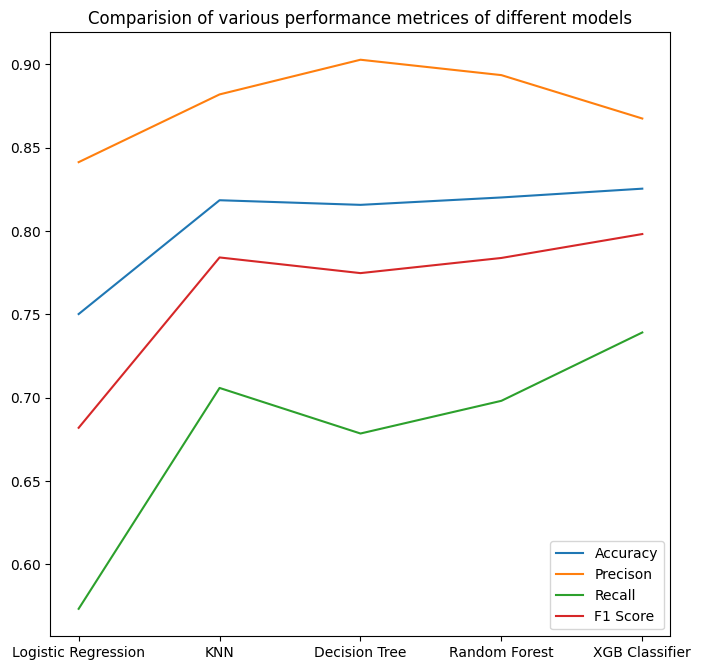

In [116]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(list(accuracy.values()))
plt.plot(list(precision.values()))
plt.plot(list(recall.values()))
plt.plot(list(f1.values()))
plt.legend(['Accuracy', 'Precison', 'Recall', 'F1 Score', 'AUC Score'], loc='lower right')
plt.xticks(range(len(accuracy)), ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGB Classifier'])
plt.title('Comparision of various performance metrices of different models')
plt.show()

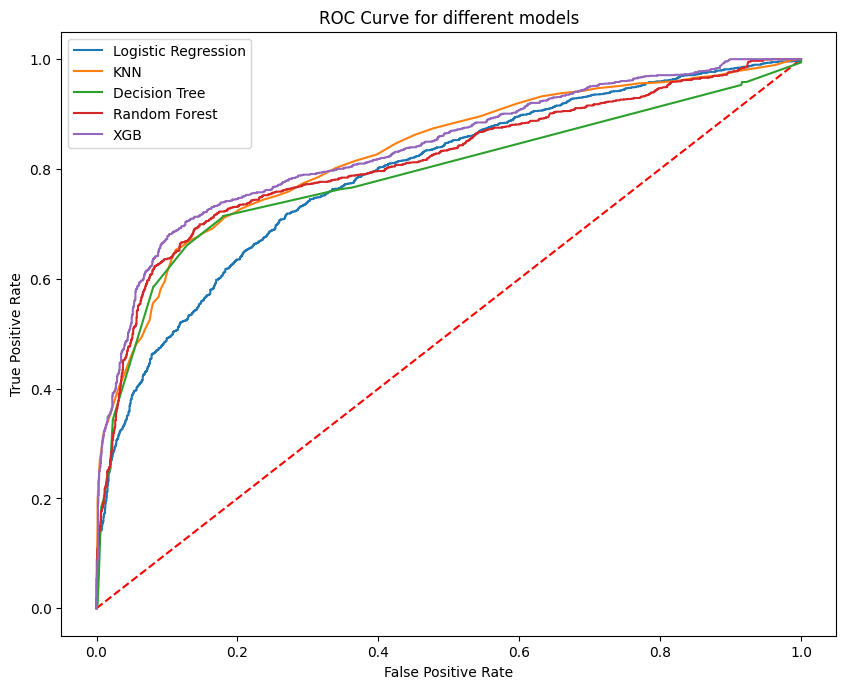

In [117]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1],'r--')
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_score)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_score_KN)
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_score_dt)
fpr_4, tpr_4, thresholds = roc_curve(y_test, y_score_RF)
fpr_5, tpr_5, thresholds = roc_curve(y_test, y_score_XGB)

plt.plot(fpr_1, tpr_1, label= "Logistic Regression")
plt.plot(fpr_2, tpr_2, label= "KNN")
plt.plot(fpr_3, tpr_3, label= "Decision Tree")
plt.plot(fpr_4, tpr_4, label= "Random Forest")
plt.plot(fpr_5, tpr_5, label= "XGB")

plt.title('ROC Curve for different models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()